In this notebook we identify IEM related publications with a topic model.

In [1]:
%run "Common Setup.ipynb"

C:\programs\miniconda3\envs\holistic-iem\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
filtered_rc = wosis.load_query_results('{}/initial_filtered_corpora.txt'.format(TMP_DIR))
num_records = []

In [3]:
# Cache results to a specific file for later reuse
iem_topics = wosis.find_topics(filtered_rc, cache_as='{}/iem_topic.pkl'.format(TMP_DIR))

C:\programs\miniconda3\envs\holistic-iem\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator NMF from version 0.20.0 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Topic 1: model framework integr environment develop approach process support design assess
Topic 2: climat chang climate change impact scenario futur global project adapt
Topic 3: flow runoff river hydrolog basin catchment model wa simul hydrological
Topic 4: water irrig groundwat resourc manag demand qualiti river resources basin
Topic 5: land use cover chang agricultur scenario spatial urban change crop
Topic 6: emiss air energi carbon cost pollut emissions polici reduct gas
Topic 7: flood risk event forecast urban rainfal peak extrem hazard river
Topic 8: soil moistur moisture spatial content wa properti surfac field scale
Topic 9: ecosystem forest carbon speci ecolog habitat fish area lake veget
Topic 10: data model uncertainti use method paramet spatial estim hydrolog predict


Based on the above results Topic 1 is selected to represent modeling frameworks

In [4]:
framework_pubs = iem_topics.get_topic_by_id(1)
iem_frameworks_rc = wosis.extract_recs(framework_pubs.id, filtered_rc)

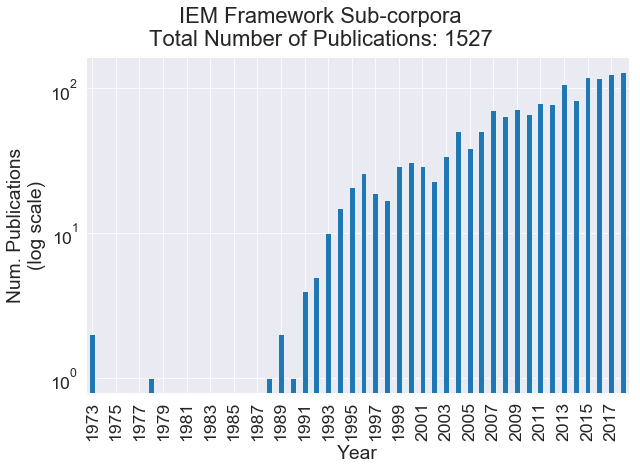

In [5]:
wos_plot.plot_pub_trend(iem_frameworks_rc, title='IEM Framework Sub-corpora', 
                        save_plot_fn='{}/iem_framework_subcorpora'.format(FIG_DIR))

In [6]:
iem_frameworks_df = wosis.rc_to_df(iem_frameworks_rc)
linked = wosis.link_to_pub(iem_frameworks_df)
linked.loc[linked.year == min(linked.year), ~linked.columns.isin(hide_columns)]

,year,title,copyright,AU,SO,DOI link
615,1973,ENVIRONMENTAL MODELING VS CHICKEN-SOUP APPROAC...,,"HOUSE, PW",SIMULATION,https://dx.doi.org/10.1177/003754977302000601
1484,1973,ENVIRONMENTAL MODELING,,"MCKENNA, N",SIMULATION,https://dx.doi.org/10.1177/003754977302000201


In [7]:
after_drought = linked.loc[linked.year == 1988, ~linked.columns.isin(hide_columns)]
after_drought

,year,title,copyright,AU,SO,DOI link
1288,1988,TECHNICAL MODELING FOR POLICY MAKING - INTEGRA...,,"MARNICIO, RJ|RUBIN, ES",MATHEMATICAL AND COMPUTER MODELLING,https://dx.doi.org/10.1016/0895-7177(88)90655-3


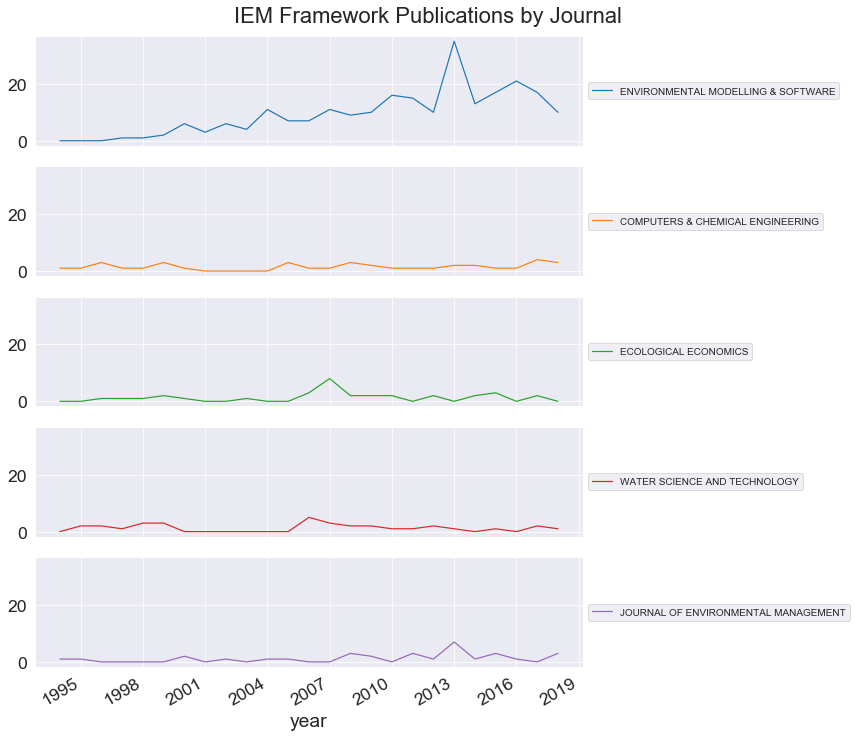

In [8]:
wos_plot.plot_journal_pub_trend(iem_frameworks_rc, title='IEM Framework Publications by Journal', top_n=5)

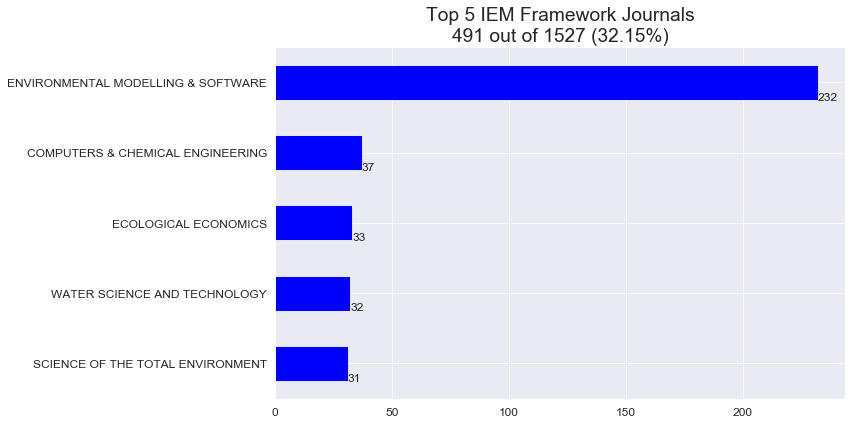

In [9]:
wos_plot.plot_pubs_per_journal(iem_frameworks_rc, title='Top 5 IEM Framework Journals', 
                               top_n=5, annotate=True,
                               save_plot_fn='{}/iem_framework_subcorpora_top5_journals'.format(FIG_DIR)
                              )

In [10]:
cited_iem_frameworks = wosis.get_num_citations(iem_frameworks_rc, WOS_CONFIG, 
                                               cache_as='{}/iem_framework_citations.csv'.format(TMP_DIR))

cited_iem_frameworks.head(10)['title'].tolist()

['SCALE ISSUES IN HYDROLOGICAL MODELING - A REVIEW',
 'Examining the global environmental impact of regional consumption activities - Part 2: Review of input-output models for the assessment of environmental impacts embodied in trade',
 'Ten iterative steps in development and evaluation of environmental models',
 'Categorising tools for sustainability assessment',
 'Assessing the vulnerability of social-environmental systems',
 'Biotic ligand model, a flexible tool for developing site-specific water quality guidelines for metals',
 'Biotic ligand model of the acute toxicity of metals. 2. Application to acute copper toxicity in freshwater fish and Daphnia',
 'The tokamak Monte Carlo fast ion module NUBEAM in the National Transport Code Collaboration library',
 'A neuro-fuzzy computing technique for modeling hydrological time series',
 'Environmental copper: Its dynamics and human exposure issues']

In [21]:
cited_iem_frameworks = wosis.calc_average_citations(cited_iem_frameworks, max_year=2018, sort=True)

make_safe_display(cited_iem_frameworks.head(10))

,AU,SO,copyright,title,year,citations,Avg. Citations
58,"Samir, K. C.|Lutz, Wolfgang",GLOBAL ENVIRONMENTAL CHANGE-HUMAN AND POLICY D...,Elsevier Ltd. This is an open access article ...,The human core of the shared socioeconomic pat...,2017,105,52.50
1,"Wiedmann, Thomas|Lenzen, Manfred|Turner, Karen...",ECOLOGICAL ECONOMICS,(c) 2006 Elsevier B.V. All rights reserved.,Examining the global environmental impact of r...,2007,623,51.92
39,"Pianosi, Francesca|Beven, Keith|Freer, Jim|Hal...",ENVIRONMENTAL MODELLING & SOFTWARE,Elsevier Ltd. This is an open access article ...,Sensitivity analysis of environmental models: ...,2016,138,46.00
15,"Kelly (Letcher), Rebecca A.|Jakeman, Anthony J...",ENVIRONMENTAL MODELLING & SOFTWARE,Elsevier Ltd. All rights reserved.,Selecting among five common modelling approach...,2013,266,44.33
3,"Ness, Barry|Urbel-Piirsalu, Evelin|Anderberg, ...",ECOLOGICAL ECONOMICS,(c) 2006 Elsevier B.V. All rights reserved.,Categorising tools for sustainability assessment,2007,476,39.67
2,"Jakeman, AJ|Letcher, RA|Norton, JP",ENVIRONMENTAL MODELLING & SOFTWARE,Elsevier Ltd. All rights reserved.,Ten iterative steps in development and evaluat...,2006,512,39.38
16,"Neteler, Markus|Bowman, M. Hamish|Landa, Marti...",ENVIRONMENTAL MODELLING & SOFTWARE,Elsevier Ltd. All rights reserved.,GRASS GIS: A multi-purpose open source GIS,2012,266,38.00
23,"Laniak, Gerard F.|Olchin, Gabriel|Goodall, Jon...",ENVIRONMENTAL MODELLING & SOFTWARE,Published by Elsevier Ltd.,Integrated environmental modeling: A vision an...,2013,221,36.83
20,"Toth, Gabor|van der Holst, Bart|Sokolov, Igor ...",JOURNAL OF COMPUTATIONAL PHYSICS,(C) 2011 Elsevier Inc. All rights reserved.,Adaptive numerical algorithms in space weather...,2012,253,36.14
13,"Bazilian, Morgan|Rogner, Holger|Howells, Mark|...",ENERGY POLICY,Elsevier Ltd. All rights reserved.,"Considering the energy, water and food nexus: ...",2011,272,34.00


Get citations for each paper in the decade and select the most cited for review

In [12]:
early_stage = iem_frameworks_rc.yearSplit(1987, 1999)
mid_stage = iem_frameworks_rc.yearSplit(2000, 2009)
late_stage = iem_frameworks_rc.yearSplit(2010, 2019)

cited_early_stage = wosis.get_num_citations(early_stage, WOS_CONFIG, 
                                            cache_as='{}/earlystage_iem_citations.csv'.format(TMP_DIR))

cited_mid_stage = wosis.get_num_citations(mid_stage, WOS_CONFIG, 
                                          cache_as='{}/midstage_iem_citations.csv'.format(TMP_DIR))

cited_late_stage = wosis.get_num_citations(late_stage, WOS_CONFIG, 
                                          cache_as='{}/latestage_iem_citations.csv'.format(TMP_DIR))

In [13]:
cited_early_stage = wosis.calc_average_citations(cited_early_stage, max_year=2018, sort=True)
linked_cited_early_stage = wosis.link_to_pub(cited_early_stage.head(10))

make_safe_display(linked_cited_early_stage)

,AU,SO,copyright,title,year,citations,Avg. Citations,DOI link
0,"BLOSCHL, G|SIVAPALAN, M",HYDROLOGICAL PROCESSES,NaN,SCALE ISSUES IN HYDROLOGICAL MODELING - A REVIEW,1995,748,31.17,https://dx.doi.org/10.1002/hyp.3360090305
1,"MANNE, A|MENDELSOHN, R|RICHELS, R",ENERGY POLICY,NaN,A MODEL FOR EVALUATING REGIONAL AND GLOBAL EFF...,1995,288,12.00,https://dx.doi.org/10.1016/0301-4215(95)90763-W
2,"Yeomans, H|Grossmann, IE",COMPUTERS & CHEMICAL ENGINEERING,(C) 1999 Elsevier Science Ltd. All rights res...,A systematic modeling framework of superstruct...,1999,144,7.20,https://dx.doi.org/10.1016/S0098-1354(99)00003-4
3,"Mandelbaum, A|Massey, WA|Reiman, MI",QUEUEING SYSTEMS,NaN,Strong approximations for Markovian service ne...,1998,129,6.14,https://dx.doi.org/10.1023/A:1019112920622
4,"Rizzoli, AE|Young, WJ",ENVIRONMENTAL MODELLING & SOFTWARE,(C) 1997 Elsevier Science Ltd.,Delivering environmental decision support syst...,1997,93,4.23,https://dx.doi.org/10.1016/S1364-8152(97)00016-9
6,"Corwin, DL|Vaughan, PJ|Loague, K",ENVIRONMENTAL SCIENCE & TECHNOLOGY,NaN,Monitoring nonpoint source pollutants in the v...,1997,88,4.00,https://dx.doi.org/10.1021/es960796v
5,"Rotmans, J|VanAsselt, M",CLIMATIC CHANGE,NaN,Integrated assessment: A growing child on its ...,1996,89,3.87,https://dx.doi.org/10.1007/BF00139296
7,"Levitan, L|Merwin, |Kovach, J",AGRICULTURE ECOSYSTEMS & ENVIRONMENT,NaN,Assessing the relative environmental impacts o...,1995,75,3.12,https://dx.doi.org/10.1016/0167-8809(95)00622-Y
8,"ENGELEN, G|WHITE, R|ULJEE, |DRAZAN, P",ENVIRONMENTAL MONITORING AND ASSESSMENT,NaN,USING CELLULAR-AUTOMATA FOR INTEGRATED MODELIN...,1995,74,3.08,https://dx.doi.org/10.1007/BF00546036
10,"OConnell, PE|Todini, E",JOURNAL OF HYDROLOGY,NaN,"Modelling of rainfall, flow and mass transport...",1996,65,2.83,https://dx.doi.org/10.1016/S0022-1694(96)80003-5


In [14]:
cited_mid_stage = wosis.calc_average_citations(cited_mid_stage, max_year=2018, sort=True)
linked_cited_mid_stage = wosis.link_to_pub(cited_mid_stage.head(10))

make_safe_display(linked_cited_mid_stage)

,AU,SO,copyright,title,year,citations,Avg. Citations,DOI link
0,"Wiedmann, Thomas|Lenzen, Manfred|Turner, Karen...",ECOLOGICAL ECONOMICS,(c) 2006 Elsevier B.V. All rights reserved.,Examining the global environmental impact of r...,2007,623,51.92,https://dx.doi.org/10.1016/j.ecolecon.2006.12.003
2,"Ness, Barry|Urbel-Piirsalu, Evelin|Anderberg, ...",ECOLOGICAL ECONOMICS,(c) 2006 Elsevier B.V. All rights reserved.,Categorising tools for sustainability assessment,2007,476,39.67,https://dx.doi.org/10.1016/j.ecolecon.2006.07.023
1,"Jakeman, AJ|Letcher, RA|Norton, JP",ENVIRONMENTAL MODELLING & SOFTWARE,Elsevier Ltd. All rights reserved.,Ten iterative steps in development and evaluat...,2006,512,39.38,https://dx.doi.org/10.1016/j.envsoft.2006.01.004
3,"Eakin, Hallie|Luers, Amy Lynd",ANNUAL REVIEW OF ENVIRONMENT AND RESOURCES,NaN,Assessing the vulnerability of social-environm...,2006,401,30.85,https://dx.doi.org/10.1146/annurev.energy.30.0...
4,"Niyogi, S|Wood, CM",ENVIRONMENTAL SCIENCE & TECHNOLOGY,NaN,"Biotic ligand model, a flexible tool for devel...",2004,381,25.40,https://dx.doi.org/10.1021/es0496524
9,"Liu, Jianguo|Dietz, Thomas|Carpenter, Stephen ...",AMBIO,NaN,Coupled human and natural systems,2007,304,25.33,https://dx.doi.org/10.1579/0044-7447(2007)36[6...
10,"Antiga, Luca|Piccinelli, Marina|Botti, Lorenzo...",MEDICAL & BIOLOGICAL ENGINEERING & COMPUTING,NaN,An image-based modeling framework for patient-...,2008,274,24.91,https://dx.doi.org/10.1007/s11517-008-0420-1
6,"Pankin, A|McCune, D|Andre, R|Bateman, G|Kritz, A",COMPUTER PHYSICS COMMUNICATIONS,(C) 2004 Elsevier B.V. All rights reserved.,The tokamak Monte Carlo fast ion module NUBEAM...,2004,339,22.60,https://dx.doi.org/10.1016/j.cpc.2003.11.002
7,"Nayak, PC|Sudheer, KP|Rangan, DM|Ramasastri, KS",JOURNAL OF HYDROLOGY,(C) 2004 Elsevier B.V. All rights reserved.,A neuro-fuzzy computing technique for modeling...,2004,328,21.87,https://dx.doi.org/10.1016/j.jhydrol.2003.12.010
11,"Lemos, MC|Morehouse, BJ",GLOBAL ENVIRONMENTAL CHANGE-HUMAN AND POLICY D...,&COPY; 2004 Elsevier Ltd. All rights reserved.,The co-production of science and policy in int...,2005,271,19.36,https://dx.doi.org/10.1016/j.gloenvcha.2004.09...


In [15]:
cited_late_stage = wosis.calc_average_citations(cited_late_stage, max_year=2018, sort=True)
linked_cited_late_stage = wosis.link_to_pub(cited_late_stage.head(10))

make_safe_display(linked_cited_late_stage)

,AU,SO,copyright,title,year,citations,Avg. Citations,DOI link
21,"Samir, K. C.|Lutz, Wolfgang",GLOBAL ENVIRONMENTAL CHANGE-HUMAN AND POLICY D...,Elsevier Ltd. This is an open access article ...,The human core of the shared socioeconomic pat...,2017,105,52.50,https://dx.doi.org/10.1016/j.gloenvcha.2014.06...
10,"Pianosi, Francesca|Beven, Keith|Freer, Jim|Hal...",ENVIRONMENTAL MODELLING & SOFTWARE,Elsevier Ltd. This is an open access article ...,Sensitivity analysis of environmental models: ...,2016,138,46.00,https://dx.doi.org/10.1016/j.envsoft.2016.02.008
1,"Kelly (Letcher), Rebecca A.|Jakeman, Anthony J...",ENVIRONMENTAL MODELLING & SOFTWARE,Elsevier Ltd. All rights reserved.,Selecting among five common modelling approach...,2013,266,44.33,https://dx.doi.org/10.1016/j.envsoft.2013.05.005
2,"Neteler, Markus|Bowman, M. Hamish|Landa, Marti...",ENVIRONMENTAL MODELLING & SOFTWARE,Elsevier Ltd. All rights reserved.,GRASS GIS: A multi-purpose open source GIS,2012,266,38.00,https://dx.doi.org/10.1016/j.envsoft.2011.11.014
4,"Laniak, Gerard F.|Olchin, Gabriel|Goodall, Jon...",ENVIRONMENTAL MODELLING & SOFTWARE,Published by Elsevier Ltd.,Integrated environmental modeling: A vision an...,2013,221,36.83,https://dx.doi.org/10.1016/j.envsoft.2012.09.006
3,"Toth, Gabor|van der Holst, Bart|Sokolov, Igor ...",JOURNAL OF COMPUTATIONAL PHYSICS,(C) 2011 Elsevier Inc. All rights reserved.,Adaptive numerical algorithms in space weather...,2012,253,36.14,https://dx.doi.org/10.1016/j.jcp.2011.02.006
0,"Bazilian, Morgan|Rogner, Holger|Howells, Mark|...",ENERGY POLICY,Elsevier Ltd. All rights reserved.,"Considering the energy, water and food nexus: ...",2011,272,34.00,https://dx.doi.org/10.1016/j.enpol.2011.09.039
24,"Voinov, Alexey|Kolagani, Nagesh|McCall, Michae...",ENVIRONMENTAL MODELLING & SOFTWARE,Elsevier Ltd. All rights reserved.,Modelling with stakeholders - Next generation,2016,100,33.33,https://dx.doi.org/10.1016/j.envsoft.2015.11.016
14,"Uusitalo, Laura|Lehikoinen, Annukka|Helle, Ina...",ENVIRONMENTAL MODELLING & SOFTWARE,Published by Elsevier Ltd.,An overview of methods to evaluate uncertainty...,2015,123,30.75,https://dx.doi.org/10.1016/j.envsoft.2014.09.017
19,"Clark, Martyn P.|Nijssen, Bart|Lundquist, Jess...",WATER RESOURCES RESEARCH,NaN,A unified approach for process-based hydrologi...,2015,107,26.75,https://dx.doi.org/10.1002/2015WR017198


<hr>

In [24]:
from functools import reduce

In [16]:
early_stage_topics = wosis.find_topics(early_stage, cache_as='{}/early_stage_topics.pkl'.format(TMP_DIR))

Topic 1: model design process approach integr tool support simul manufactur use
Topic 2: assess environment assessment integr polici econom change climat global impact
Topic 3: gis nps zone vados spatial data pollut model resourc manag
Topic 4: modeling environmental integrated ecological landscape techniques making large special scale
Topic 5: sewer treatment plant wastewat wastewater control project real transport drainag
Topic 6: systemat represent integ linear mix heat problems state network integration
Topic 7: integrated assessment way debate acid link national potential evaluation methodology
Topic 8: heat exchang mass network synthesi transfer synthesis framework process represent
Topic 9: ia assessments integrated change integr adapt assessment form complex policy
Topic 10: hybrid minlp disjunct disjunctive logmip algorithm linear program solv non


In [33]:
subtopics_of_interest = [df for df in map(early_stage_topics.get_topic_by_id, [1, 4, 7, 9])]
combined_early_subtopics = reduce(lambda x, y: x + y, [wosis.extract_recs(st.id, early_stage) for st in subtopics_of_interest])

combined_early_subtopics.name = 'Combined Early-Stage Topics'

In [36]:
# sub-topics
cited_es_st = wosis.calc_average_citations(
    wosis.get_num_citations(
        combined_early_subtopics, 
        WOS_CONFIG, 
        cache_as='{}/early_stage_st_citations.csv'.format(TMP_DIR)
    ),
    max_year=2018,
    sort=True
)

Authenticated (SID: 6EAg5mYuG9KFf3wMkn5)


In [38]:
make_safe_display(cited_es_st.head(15))

,year,title,copyright,AU,SO,citations,Avg. Citations
0,1995,SCALE ISSUES IN HYDROLOGICAL MODELING - A REVIEW,,"BLOSCHL, G|SIVAPALAN, M",HYDROLOGICAL PROCESSES,764,31.83
1,1998,Strong approximations for Markovian service ne...,,"Mandelbaum, A|Massey, WA|Reiman, MI",QUEUEING SYSTEMS,129,6.14
2,1997,Delivering environmental decision support syst...,(C) 1997 Elsevier Science Ltd.,"Rizzoli, AE|Young, WJ",ENVIRONMENTAL MODELLING & SOFTWARE,93,4.23
3,1996,Integrated assessment: A growing child on its ...,,"Rotmans, J|VanAsselt, M",CLIMATIC CHANGE,89,3.87
4,1996,"Modelling of rainfall, flow and mass transport...",,"OConnell, PE|Todini, E",JOURNAL OF HYDROLOGY,65,2.83
5,1998,The battle of perspectives: a multi-agent mode...,(C) 1998 Elsevier Science B.V. All rights res...,"Janssen, M|de Vries, B",ECOLOGICAL ECONOMICS,57,2.71
6,1997,GRAI integrated methodology and its mapping on...,(C) 1997 Elsevier Science B.V.,"Chen, D|Vallespir, B|Doumeingts, G",COMPUTERS IN INDUSTRY,55,2.50
8,1999,A framework for modelling multiple resource ma...,(C) 1999 Elsevier Science Ltd. Ail rights res...,"Reed, M|Cuddy, SM|Rizzoli, AE",ENVIRONMENTAL MODELLING & SOFTWARE,45,2.25
10,1999,Advanced bottom-up modelling for national and ...,,"Kanudia, A|Loulou, R",INTERNATIONAL JOURNAL OF ENVIRONMENT AND POLLU...,44,2.20
11,1999,An integrated modelling method to support manu...,(C) 1999 Elsevier Science B.V. All rights res...,"Al-Ahmari, AMA|Ridgway, K",COMPUTERS IN INDUSTRY,43,2.15


In [ ]:
# top_10_es_st = cited_es_st.head(10)
# es_pubs_interest = wosis.rc_to_df(wosis.extract_recs(top_10_es_st.id, early_stage))
# es_phrases = wosis.find_phrases(es_pubs_interest)
# ms_phrases.all_phrases.to_csv('{}/ms_phrases.csv'.format(DATA_DIR))
# top_10_ms_st.loc[:, ~(top_10_ms_st.columns.isin(hide_columns))]
# mid_stage_st_df = wosis.rc_to_df(combined_subtopics)

<hr>

In [17]:
mid_stage_topics = wosis.find_topics(mid_stage, cache_as='{}/mid_stage_topics.pkl'.format(TMP_DIR))

Topic 1: model framework simul use develop data process models differ approach
Topic 2: assess assessment impact polici integr environment social sustain integrated econom
Topic 3: environmental modelling software technology pollution special environment concepts spatial integrating
Topic 4: urban drainag water wastewater drainage sewer wastewat integrated integr treatment
Topic 5: control real tim systems manufactur dynam manufacturing cell autom power
Topic 6: water river basin manag management catchment tool project watersh integr
Topic 7: ecological modeling management making decision science resource concept use approaches
Topic 8: risk health human exposur exposure contamin assess assessment remedi virus
Topic 9: design product manufactur function behavior object engin modeling conceptu framework
Topic 10: support decis decision dss tools criteria modular example systems tool


In [18]:
late_stage_topics = wosis.find_topics(late_stage, cache_as='{}/late_stage_topics.pkl'.format(TMP_DIR))

Topic 1: model framework use modeling process simul models data develop design
Topic 2: assess sustain social environment integr assessment decision manag polici econom
Topic 3: risk health assess hazard assessment risks manag predict exposur pesticid
Topic 4: urban citi sewer water wastewat stormwat treatment plan wastewater sustain
Topic 5: life lca cycl cycle lcsa impact environment product assessment sustain
Topic 6: software environmental modelling environment uncertainty analysis environments softwar data health
Topic 7: agent based bas simul simulation price human market modelling social
Topic 8: hydrolog water river watersh hydrological basin human catchment socio swat
Topic 9: transport field scale solut fate zone dispers sediment non site
Topic 10: food nexus energy secur wast popul demand global crop systems


In [19]:
# from functools import reduce

# subtopics_of_interest = [df for df in map(mid_stage_topics.get_topic_by_id, [1, 2, 3, 10])]
# combined_subtopics = reduce(lambda x, y: x + y, [wosis.extract_recs(st.id, mid_stage) for st in subtopics_of_interest])

# combined_subtopics.name = 'Combined Mid-Stage Topics'

In [20]:
# # sub-topics
# cited_ms_st = wosis.calc_average_citations(
#     wosis.get_num_citations(
#         combined_subtopics, 
#         WOS_CONFIG, 
#         cache_as='{}/mid_stage_st_citations.csv'.format(TMP_DIR)
#     ),
#     max_year=2018,
#     sort=True
# )

In [ ]:
# top_10_ms_st = cited_ms_st.head(10)
# ms_pubs_interest = wosis.rc_to_df(wosis.extract_recs(top_10_ms_st.id, mid_stage))
# ms_phrases = wosis.find_phrases(ms_pubs_interest)
# ms_phrases.all_phrases.to_csv('{}/ms_phrases.csv'.format(DATA_DIR))
# top_10_ms_st.loc[:, ~(top_10_ms_st.columns.isin(hide_columns))]
# mid_stage_st_df = wosis.rc_to_df(combined_subtopics)

In [30]:
# All mid-stage publications
cited_ms = wosis.calc_average_citations(
    wosis.get_num_citations(
        mid_stage, 
        WOS_CONFIG, 
        cache_as='{}/mid_stage_citations.csv'.format(TMP_DIR)
    ),
    max_year=2018,
    sort=True
)

Authenticated (SID: 8D9k1sPIITUNVSCjF6r)


In [39]:
ms_pubs_of_interest = cited_ms.head(10)

In [40]:
linked_ms_pubs_interest = wosis.link_to_pub(ms_pubs_of_interest)

In [41]:
linked_ms_pubs_interest.loc[:, ~(linked_ms_pubs_interest.columns.isin(hide_columns))]

,year,title,copyright,AU,SO,citations,Avg. Citations,DOI link
0,2007,Examining the global environmental impact of r...,(c) 2006 Elsevier B.V. All rights reserved.,"Wiedmann, Thomas|Lenzen, Manfred|Turner, Karen...",ECOLOGICAL ECONOMICS,650,54.17,https://dx.doi.org/10.1016/j.ecolecon.2006.12.003
2,2007,Categorising tools for sustainability assessment,(c) 2006 Elsevier B.V. All rights reserved.,"Ness, Barry|Urbel-Piirsalu, Evelin|Anderberg, ...",ECOLOGICAL ECONOMICS,488,40.67,https://dx.doi.org/10.1016/j.ecolecon.2006.07.023
1,2006,Ten iterative steps in development and evaluat...,Elsevier Ltd. All rights reserved.,"Jakeman, AJ|Letcher, RA|Norton, JP",ENVIRONMENTAL MODELLING & SOFTWARE,524,40.31,https://dx.doi.org/10.1016/j.envsoft.2006.01.004
3,2006,Assessing the vulnerability of social-environm...,,"Eakin, Hallie|Luers, Amy Lynd",ANNUAL REVIEW OF ENVIRONMENT AND RESOURCES,408,31.38,https://dx.doi.org/10.1146/annurev.energy.30.0...
9,2007,Coupled human and natural systems,,"Liu, Jianguo|Dietz, Thomas|Carpenter, Stephen ...",AMBIO,312,26.00,https://dx.doi.org/10.1579/0044-7447(2007)36[6...
4,2004,"Biotic ligand model, a flexible tool for devel...",,"Niyogi, S|Wood, CM",ENVIRONMENTAL SCIENCE & TECHNOLOGY,387,25.80,https://dx.doi.org/10.1021/es0496524
11,2008,An image-based modeling framework for patient-...,,"Antiga, Luca|Piccinelli, Marina|Botti, Lorenzo...",MEDICAL & BIOLOGICAL ENGINEERING & COMPUTING,281,25.55,https://dx.doi.org/10.1007/s11517-008-0420-1
6,2004,The tokamak Monte Carlo fast ion module NUBEAM...,(C) 2004 Elsevier B.V. All rights reserved.,"Pankin, A|McCune, D|Andre, R|Bateman, G|Kritz, A",COMPUTER PHYSICS COMMUNICATIONS,345,23.00,https://dx.doi.org/10.1016/j.cpc.2003.11.002
7,2004,A neuro-fuzzy computing technique for modeling...,(C) 2004 Elsevier B.V. All rights reserved.,"Nayak, PC|Sudheer, KP|Rangan, DM|Ramasastri, KS",JOURNAL OF HYDROLOGY,340,22.67,https://dx.doi.org/10.1016/j.jhydrol.2003.12.010
10,2005,The co-production of science and policy in int...,&COPY; 2004 Elsevier Ltd. All rights reserved.,"Lemos, MC|Morehouse, BJ",GLOBAL ENVIRONMENTAL CHANGE-HUMAN AND POLICY D...,283,20.21,https://dx.doi.org/10.1016/j.gloenvcha.2004.09...


<hr>

In [ ]:
iem_framework_subtopics = wosis.find_topics(iem_frameworks_rc, cache_as='{}/iem_framework_subtopics.pkl'.format(TMP_DIR))

In [ ]:
emf = iem_framework_subtopics.get_topic_by_id(1)
emf_rc = wosis.extract_recs(emf.id, iem_frameworks_rc)

In [ ]:
emf_subsubtopics = wosis.find_topics(emf_rc, cache_as='{}/emf_subsubtopics.pkl'.format(TMP_DIR))

In [ ]:
integrated_frameworks = emf_subsubtopics.get_topic_by_id(1)
web_platforms = emf_subsubtopics.get_topic_by_id(4)
component_based_development = emf_subsubtopics.get_topic_by_id(7)
scale_issues = emf_subsubtopics.get_topic_by_id(8)

In [ ]:
wos_plot.plot_pub_trend(wosis.extract_recs(integrated_frameworks.id, emf_rc))

In [ ]:
wos_plot.plot_pub_trend(wosis.extract_recs(web_platforms.id, emf_rc))

In [ ]:
wos_plot.plot_pub_trend(wosis.extract_recs(component_based_development.id, emf_rc))

In [ ]:
wos_plot.plot_pub_trend(wosis.extract_recs(scale_issues.id, emf_rc))

Average citations for integrated frameworks sub-corpora

In [ ]:
if_rc = wosis.extract_recs(integrated_frameworks.id, emf_rc)
if_citations = wosis.get_num_citations(if_rc, WOS_CONFIG, cache_as='{}/2019-03-15_if_subcorpora_citations'.format(TMP_DIR))

In [ ]:
if_citations = wosis.calc_average_citations(if_citations, max_year=2018, sort=True)

if_avg = if_citations.loc[:, ~if_citations.columns.isin(hide_columns)] # .title.tolist().head()

if_avg.loc[if_avg.year.between(1990, 1999)].head(10)


<hr>

Titles of publications found in the earliest year(s) for the sub-corporas for

1) Integrated frameworks

2) Component-based development

3) Scale issues

In [ ]:
linked = wosis.link_to_pub(integrated_frameworks)
linked.loc[linked.year == min(linked.year)].title.tolist()

In [ ]:
linked = wosis.link_to_pub(component_based_development)
linked.loc[linked.year == min(linked.year)].title.tolist()

In [ ]:
linked = wosis.link_to_pub(scale_issues)
linked.loc[linked.year == min(linked.year)].title.tolist()

<hr>

In [ ]:
frameworks = wosis.keyword_matches(emf_rc, ['software framework', 'model framework', 'model development'])

In [ ]:
frameworks.summary

Then apply the keyphrase extractor to help us further constrain the corpora

In [ ]:
emf_phrases = wosis.find_phrases(frameworks.combine_recs())
emf_phrases.all_phrases.to_csv("{}/{}_emf_modelling_phrases.csv".format(DATA_DIR, TODAY))

These titles were then manually sorted based on percieved relevance. Here, we are interested in papers that speak of issues within the development process of Integrated Environmental Models and Frameworks.

An additional column ('relevant') was added with the following:

* Yes - Relevant
* No - Not relevant
* ? - Could not determine relevance with key phrases

The results were saved into a separate CSV file (loaded in below)

In [ ]:
emf_manually_sorted = pd.read_csv('{}/emf_modelling_phrases_relevant.csv'.format(DATA_DIR))

In [ ]:
# Create links to publications for review
relevant_pubs = emf_manually_sorted[emf_manually_sorted.relevant == 'Yes']
relevant_pubs_rc = wosis.find_pubs_by_doi(filtered_rc, relevant_pubs.DOI)
relevant_pubs_df = wosis.rc_to_df(relevant_pubs_rc)
relevant_pubs_df = wosis.link_to_pub(relevant_pubs_df)
relevant_pubs_df.loc[:, ['title', 'year', 'DOI link']].sort_values('year').reset_index(drop=True)

In [ ]:
ems_software = iem_framework_subtopics.get_topic_by_id(6)

In [ ]:
ems_software_rc = wosis.extract_recs(ems_software.id, filtered_rc)
len(ems_software_rc)

<hr>

In [ ]:
iem_framework_subtopics

In [ ]:
keywords = set(["software practice", "software development", "software engineering", 
                "best practice", "modeling practice"])

# search_results = wosis.find_keywords(filtered_rc, keywords, threshold=95.0)
matches = wosis.keyword_matches(filtered_rc, keywords, 95.0)

wos_plot.plot_pub_per_kw(matches, filtered_rc, 'Practices', 
                         save_plot_fn='{}/pubs_per_practices_kw'.format(FIG_DIR))

In [ ]:
keywords = set(["software practice", "software development", "github", "bitbucket", "gitlab"])

search_results = wosis.find_keywords(iem_assessment_rc, keywords, threshold=95.0)

matches = wosis.keyword_matches(search_results, keywords, 95.0)

# save_plot_fn='{}/pubs_per_practices_kw'.format(FIG_DIR)
wos_plot.plot_pub_per_kw(matches.recs, matches.summary, iem_assessment_rc, 'Version Control')

In [ ]:
software_phrases = wosis.find_phrases(software_in_iem)

In [ ]:
software_phrases.display_phrases()